**Import the usual libraries.**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Read in the car_plate.jpg file.**

In [45]:
img = cv2.imread("car_plate.jpg")

**Create a function that displays the image in a larger scale and correct coloring for matplotlib.**

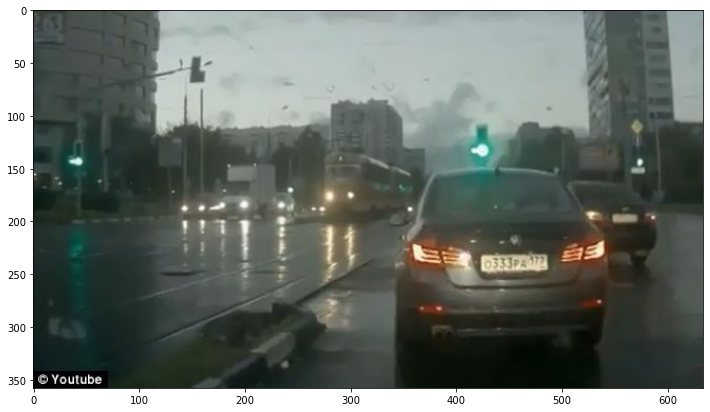

In [46]:
def display(img):
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)
    
display(img)

**Load the haarcascade_russian_plate_number.xml file.**

In [10]:
cascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

**Create a function that takes in an image and draws a rectangle around what it detects to be a license plate.**

In [41]:
def detect_plate(img):
    rectangles = cascade.detectMultiScale(img , 1.2 , 5)
    
    for (x,y,w,h) in rectangles :
        cv2.rectangle(img , (x,y) , (x+w , y+h) , (255,255,255) , 5)
        
    return img
    
  
    

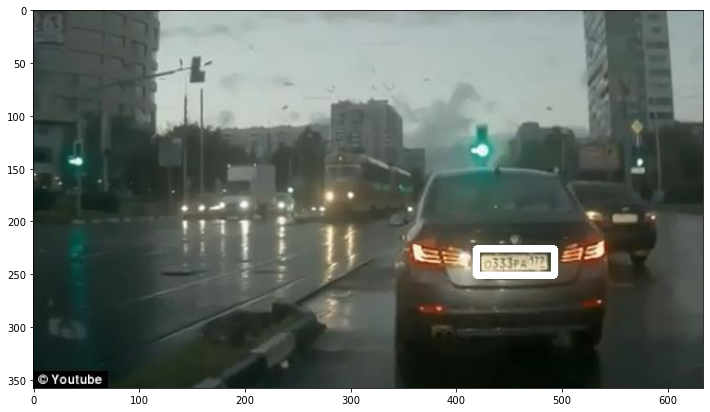

In [47]:
img = cv2.imread("car_plate.jpg")
result = detect_plate(img)
display(result)

**Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it.

In [43]:
def detect_and_blur_plate(img):
    rectangles = cascade.detectMultiScale(img , 1.2 , 5)
    
    for (x,y,w,h) in rectangles :
        #cv2.rectangle(img , (x,y) , (x+w , y+h) , (255,255,255) , 5)
        img[ y:y+h , x:x+w , :] = cv2.blur(src = img[ y:y+h , x:x+w , :] , ksize=(15,15))
        
    return img   

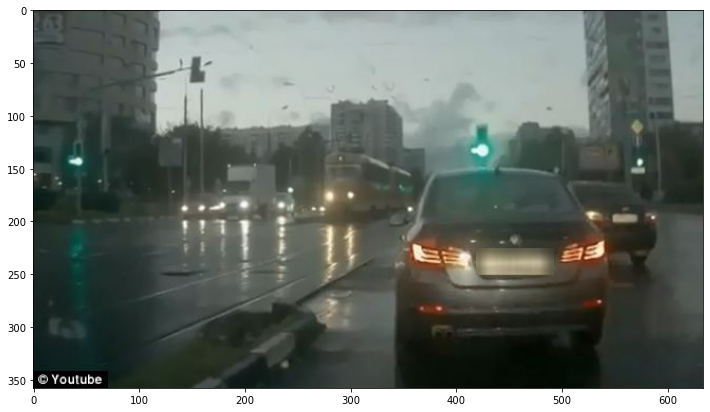

In [48]:
img = cv2.imread("car_plate.jpg")
result = detect_and_blur_plate(img)
display(result)